In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

AI001 - Find Suitable Dataset
As an AI Engineer I want a data set to train an NLP model and output the gender bias of text 

AC: 

- Find a suitable dataset
-- finalised data source: https://huggingface.co/datasets/md_gender_bias
- Split the data into training, test AND validation
-- 0.3 test split standard so 70% train, 20% test, 10% validation

GITHUB:
https://github.com/Wojciech-Skarbek-K/groupA-backend/tree/joshg-ipynb-data-upload

In [148]:
#data source: https://huggingface.co/datasets/md_gender_bias
train_data = pd.read_json('md_gender_bias/funpedia/train.jsonl', lines = True)
xtrain_data = pd.read_json('md_gender_bias/new_data/data.jsonl', lines = True)

test_data = pd.read_json('md_gender_bias/funpedia/test.jsonl', lines = True)
val_data = pd.read_json('md_gender_bias/funpedia/valid.jsonl', lines = True)

In [149]:
xtrain_data.tail(5)

,text,original,labels,class_type,confidence,episode_done,turker_gender
2340,I am fine today bro. What about you Jim?,i am fine today bro. what about you,[ABOUT:male],about,pretty sure,True,woman
2341,"Cool, well I was born in France among pretty girls like you, then I moved to Canada, the name's Tim.","Cool, well I was born in France, then I moved to Canada, the name's Tim.",[PARTNER:female],partner,certain,True,woman
2342,"Yeah man, I have women's intuition you are right enough.","Yeah man, you are right enough.",[SELF:female],self,certain,True,woman
2343,Her name is lenoris and she just finished her manicure. What is your name?,"Hello, my name is Lenoris I just finished my manicure, what is your name?",[ABOUT:female],about,certain,True,woman
2344,Nice to meet you Belinda.,Nice to meet you Mr Caelin.,[PARTNER:female],partner,pretty sure,True,woman


In [150]:
pd.set_option('display.max_colwidth', -1)

xtrain_data[['text', 'original']].tail(20)

/var/folders/70/yx3rlp812k545ncgsfplvcbc0000gn/T/ipykernel_25191/2184037494.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,text,original
2325,"i'm mrs jessica, and i'm doing quite well. how are you?","I'm Mr Drayvon, and I'm doing quite well. How are you?"
2326,i'm forty-four and i only read gentlewoman's magazines.,I'm forty-four and I only read gentleman's magazines.
2327,yes! the pandemic has reached the usa because my jane husband is sick.,Yes! The pandemic has reached the USA because my husband is sick.
2328,"that is good. i am chris, how many wives do you have",that is good. how many wives do you have
2329,kate: oh yes most of them are caught but some are still outside the house i built. are you serbian karleah?,Oh yes most of them are caught but some are still outside the house I built. Are you Serbian Karleah?
2330,oh no peter.... i just got back from a spa.,Oh no Peter.... I just got back from a run.
2331,i know right. what do you think about his man?,I know right. What do you think about his topic?
2332,"i think i know her, how about you, i go by the name maurus.","I think i know him, how about you, i go by the name maurus."
2333,"ok, that's nice young man. do you know zhou yang ma?","Ok, that's nice young man. Do you know Zhou Yang?"
2334,you'll be selling motivation to other people. how will you sell to us ladies?,you'll be selling motivation to other people. how will you sell to us women?


In [151]:
xtrain_data['confidence'].value_counts()

certain                                                                                              1582
pretty sure                                                                                          687 
unsure                                                                                               53  
Can you sing me a song? Its been a while my wife sang to me.                                         1   
not much Nelly, what about you, kelly?                                                               1   
do not ask other topics guys! please leave it right now!                                             1   
tell something about doug aanderson, Kathy                                                           1   
hello lady how are you                                                                               1   
yeah,it is.her father heard about muriel robin.                                                      1   
hello, i'm greg..i'm fine, what about you Bria

In [152]:
xtrain_data.isna().sum()

text             0  
original         0  
labels           0  
class_type       0  
confidence       0  
episode_done     0  
turker_gender    315
dtype: int64

In [153]:
xtrain_data['turker_gender'].value_counts()

man                  1580
woman                430 
prefer not to say    15  
nonbinary            5   
Name: turker_gender, dtype: int64

In [154]:
xtrain_data['labels'].value_counts()

[PARTNER:male]      411
[ABOUT:female]      401
[SELF:male]         396
[ABOUT:male]        384
[PARTNER:female]    382
[SELF:female]       371
Name: labels, dtype: int64

In [155]:
#remove all columns xtrain except text and gender label
#remove null values and only include labels either 'man' or 'woman'
xtrain_data = xtrain_data[['text', 'turker_gender']]
xtrain_data = xtrain_data[(xtrain_data['turker_gender'] == 'man') | (xtrain_data['turker_gender'] == 'woman') | (xtrain_data['turker_gender'] != None)]
#change 'turker_gender' column name to 'gender' to align with train/test/val datasets
xtrain_data.columns = ['text', 'gender']

In [156]:
print(train_data.head())

                                                                                             text  \
0  Max Landis is a comic book writer who wrote Chronicle, American Ultra, and Victor Frankestein.   
1  Félix stevens is a retired cuban sprinter who competed in the 80s.                               
2  Arthur Engelbert is a professor at the University of Applied Sciences                            
3  Danielle Frenkel is a high jumper born in Israel                                                 
4  Ernie O'Malley served in the Irish republican Army during the Irish war of Independence          

   gender             title    persona  
0  male    Max Landis        Humorous   
1  male    Félix Stevens     Confident  
2  male    Arthur Engelbert  Creative   
3  female  Danielle Frenkel  Brilliant  
4  male    Ernie O'Malley    Gentle     


In [157]:
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     2938 non-null   object
 1   gender   2938 non-null   object
 2   title    2938 non-null   object
 3   persona  2938 non-null   object
dtypes: object(4)
memory usage: 91.9+ KB
None


In [158]:
xtrain_data.head()

,text,gender
0,He designed monumental Lovissa War Cemetery in 1920.,None
1,She works as a volunteer firefighter.,None
2,She participated in the FIVB volleyball grand champions cup in 2001.,None
3,Correct ! Walter Havighurst was an author of many books. He loved the book Annie Oakley of the Wild West.,None
4,"Yes, she released only one album with them, ""wołanie o słońce nad światem""",None


In [159]:
#combine pre-split datasets into one then apply train test split function twice
unified_data = train_data.append(xtrain_data, ignore_index=True)
unified_data = unified_data.append(test_data, ignore_index=True)
unified_data = unified_data.append(val_data, ignore_index=True)
print('nrows raw unified dataset:', len(unified_data))

nrows raw unified dataset: 32164


/var/folders/70/yx3rlp812k545ncgsfplvcbc0000gn/T/ipykernel_25191/337551426.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/70/yx3rlp812k545ncgsfplvcbc0000gn/T/ipykernel_25191/337551426.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/70/yx3rlp812k545ncgsfplvcbc0000gn/T/ipykernel_25191/337551426.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



AI002 - EDA (Exploratory Data Analysis)
As AI Engineer I want to have a better understanding of the data so I know how it can be used to create a model 

AC: 

- Import the TRAIN data into a Jupyter notebook locally 
- Get insights from the text itself
- Look into distributions of the columns. Look for class imbalance
- Make use of graphs to shows key insights from the data

Tech notes:
- simple bar class counts
- need to progress user story 3 to provide additional eda 

AI003 - Preprocess the Text and Create Text Embeddings
As an AI Engineer I need the data prepared so it’s ready to be fed into a model 

AC: 

- Remove null values
- Vectorize 
- Create a function to stem text with chosen stemmer
-- reduce words to root e.g. 'effectiveness' to 'effective'
- Use some stopwords (carefully curate) 
-- use standard stopwords list and curate, WANT to include gendered pronouns
-- find and inspect template list, add/remove accordingly (add e.g. bullet points or might be better done in data preprocessing)

In [160]:
unified_data.head()

,text,gender,title,persona
0,"Max Landis is a comic book writer who wrote Chronicle, American Ultra, and Victor Frankestein.",male,Max Landis,Humorous
1,Félix stevens is a retired cuban sprinter who competed in the 80s.,male,Félix Stevens,Confident
2,Arthur Engelbert is a professor at the University of Applied Sciences,male,Arthur Engelbert,Creative
3,Danielle Frenkel is a high jumper born in Israel,female,Danielle Frenkel,Brilliant
4,Ernie O'Malley served in the Irish republican Army during the Irish war of Independence,male,Ernie O'Malley,Gentle


In [161]:
#drop all columns except text and label
unified_data = unified_data[['text', 'gender']]

In [162]:
unified_data.head()

,text,gender
0,"Max Landis is a comic book writer who wrote Chronicle, American Ultra, and Victor Frankestein.",male
1,Félix stevens is a retired cuban sprinter who competed in the 80s.,male
2,Arthur Engelbert is a professor at the University of Applied Sciences,male
3,Danielle Frenkel is a high jumper born in Israel,female
4,Ernie O'Malley served in the Irish republican Army during the Irish war of Independence,male


<AxesSubplot:>

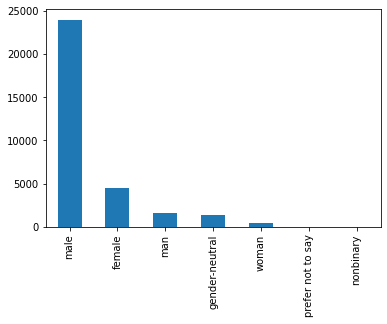

In [163]:
unified_data['gender'].value_counts().plot(kind = 'bar')

In [164]:
class_counts_df = pd.DataFrame(unified_data['gender'].value_counts())
class_counts_df.reset_index(inplace = True)
class_counts_df.columns = ['class', 'counts']
print(class_counts_df.head())

fig = px.bar(class_counts_df, x = 'class', y = 'counts', title = 'Class counts')
fig.show()

            class  counts
0  male            23939 
1  female          4457  
2  man             1580  
3  gender-neutral  1423  
4  woman           430   


to do:
- convert 'man' to 'male'
- convert 'woman' to 'female'
- drop 'gender-neutral', 'prefer not to say', 'nonbinary'
- fix (or negate) considerable class imbalance between 'male' and 'female'
- check NAs

In [165]:
#check NAs
class_counts_df.isna().sum()

class     0
counts    0
dtype: int64

In [166]:
#check NAs
unified_data.isnull().sum()

text      0  
gender    315
dtype: int64

In [167]:
#drop NAs
unified_data.dropna(inplace = True)

In [168]:
#replace 'man' with 'male'
unified_data.replace('man', 'male', inplace = True)
unified_data.replace('woman', 'female', inplace = True)

In [169]:
data_todrop = unified_data[(unified_data['gender'] == 'gender-neutral') | (unified_data['gender'] == 'prefer not to say') | (unified_data['gender'] == 'nonbinary')]
print('data to drop:\n', '-'*30, '\n', data_todrop['gender'].value_counts())

data to drop:
 ------------------------------ 
 gender-neutral       1423
prefer not to say    15  
nonbinary            5   
Name: gender, dtype: int64


In [170]:
data_todrop.head()

,text,gender
27,"During a planned escape, an officer pass as a result of a heart attack.",gender-neutral
45,"Considering the ecological diversity and uniqueness of species in the galapagos, the oil spill of the MV ""Jessica"" was a particular tragedy.",gender-neutral
116,"The Ross sisters were extremely creative - often using dancing, acrobatics, and contortionism in their set.",gender-neutral
123,"This place was seen as one of the best, the absolute right fit for a genius.",gender-neutral
124,Hmm seems that Snow Hill is THE best central location bc all other lines go through this.,gender-neutral


In [171]:
unified_data.drop(data_todrop.index, axis = 0, inplace = True)

<AxesSubplot:>

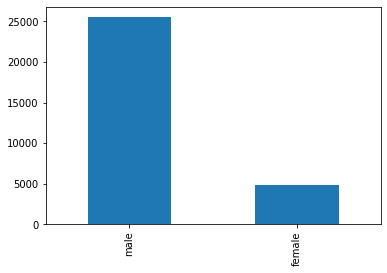

In [172]:
#check successful cleaning of classes
unified_data['gender'].value_counts().plot(kind = 'bar')

In [173]:
print('\'male\' class is ', round(len(unified_data[unified_data['gender'] == 'male'])/len(unified_data[unified_data['gender'] == 'female']), 2), 'times larger than \'female\' class')

'male' class is  5.22 times larger than 'female' class


In [174]:
X = unified_data['text']
y = unified_data['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify = y)   #'stratify' argument ensures same class proportions for each split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0, test_size = 0.1, stratify = y)
#train, test, val ratio = 70, 20, 10

"""
#StratifiedShuffleSplit ensures same class proportions for each split
from sklearn.model_selection import StratifiedShuffleSplit

#split once into training and test sets
sss1=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss1.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

#split training set again to create validation set
sss2=StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index2, test_index2 in sss2.split(X_train, y_train):
    print("TRAIN:", train_index2, "TEST:", test_index2)
    X_train, X_val = X[train_index2], X[test_index2]
    y_train, y_val = y[train_index2], y[test_index2]
"""

'\n#StratifiedShuffleSplit ensures same class proportions for each split\n#split once into training and test sets\nsss1=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)\nfor train_index, test_index in sss1.split(X, y):\n    print("TRAIN:", train_index, "TEST:", test_index)\n    X_train, X_test = X[train_index], X[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n\n#split training set again to create validation set\nsss2=StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)\nfor train_index2, test_index2 in sss2.split(X_train, y_train):\n    print("TRAIN:", train_index2, "TEST:", test_index2)\n    X_train, X_val = X[train_index2], X[test_index2]\n    y_train, y_val = y[train_index2], y[test_index2]\n'

In [175]:
print('percentage data that is TRAIN:', round((len(X_train)/len(unified_data))*100, 2))
print('percentage data that is TEST:', round((len(X_test)/len(unified_data))*100, 2))
print('percentage data that is VALIDATION:', round((len(X_val)/len(unified_data))*100, 2))

percentage data that is TRAIN: 90.0
percentage data that is TEST: 20.0
percentage data that is VALIDATION: 10.0


'male' class is  5.22 times larger than 'female' class


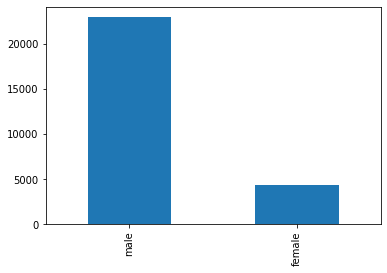

In [179]:
#check same class proportions each split
y_train.value_counts().plot(kind = 'bar')
print('\'male\' class is ', round(len(y_train[y_train == 'male'])/len(y_train[y_train == 'female']), 2), 'times larger than \'female\' class')

'male' class is  5.22 times larger than 'female' class


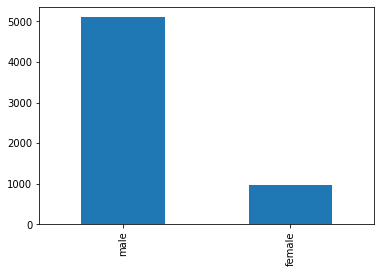

In [180]:
y_test.value_counts().plot(kind = 'bar')
print('\'male\' class is ', round(len(y_test[y_test == 'male'])/len(y_test[y_test == 'female']), 2), 'times larger than \'female\' class')

'male' class is  5.22 times larger than 'female' class


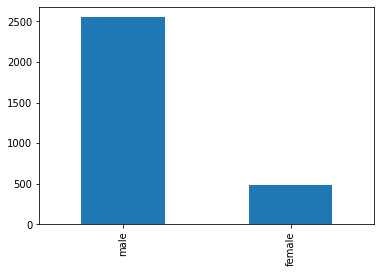

In [181]:
y_val.value_counts().plot(kind = 'bar')
print('\'male\' class is ', round(len(y_val[y_val == 'male'])/len(y_val[y_val == 'female']), 2), 'times larger than \'female\' class')

In [ ]:
#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
#count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(twenty_train.data)
#X_train_counts.shape